In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [54]:
players_clean <- players |>
  mutate(gender = factor(gender)) |>
  mutate(gender = case_when(
    gender %in% c("Male", "M") ~ "Male",
    gender %in% c("Female", "F") ~ "Female",
    TRUE ~ "Other")) |>
  mutate(gender = factor(gender, levels = c("Male", "Female", "Other"))) |>
  filter(!is.na(played_hours), played_hours > 0) |>
  filter(!is.na(Age))

players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17


In [55]:
players_final <- players_clean |>
select(played_hours, Age, gender)
players_final

played_hours,Age,gender
<dbl>,<dbl>,<fct>
30.3,9,Male
3.8,17,Male
0.7,21,Female
0.1,21,Male
0.1,17,Male
1.6,23,Female
1.5,25,Female
0.2,22,Male
48.4,17,Female


In [56]:
set.seed(10)
players_split <- initial_split(players_final, prop = 0.70, strata = Age) 
players_train <- training(players_split) 
players_test <- testing(players_split)

In [57]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(played_hours ~ Age + gender, data = players_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = players_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)           Age  genderFemale   genderOther  
     22.8478       -0.7615       24.3374       -5.3775  


In [58]:
lm_test_preds <- predict(lm_fit, new_data = players_test) |>
  bind_cols(players_test)

lm_test_results <- lm_test_preds |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,40.8059537
rsq,standard,0.0185711
mae,standard,19.4179264


In [59]:
Age_prediction_grid <- expand.grid(
  Age = seq(min(players_clean$Age, na.rm = TRUE),
            max(players_clean$Age, na.rm = TRUE),
            length.out = 100),
  gender = c("Male", "Female", "Other")
) |> 
  as_tibble()

Age_preds <- predict(lm_fit, new_data = Age_prediction_grid) |>
  bind_cols(Age_prediction_grid)

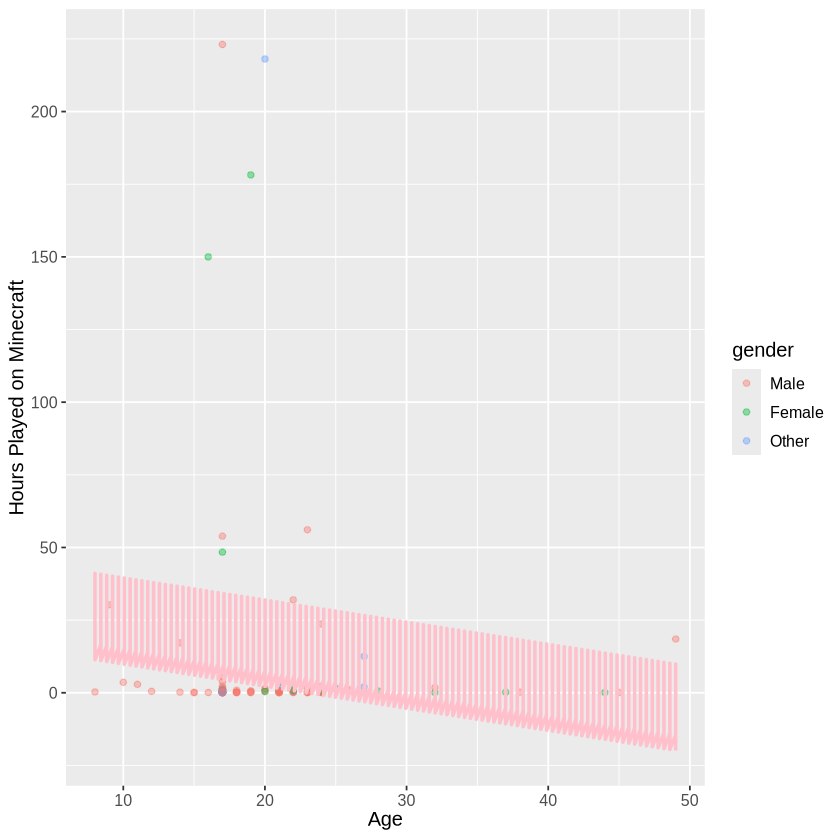

In [61]:
lm_plot_final <- ggplot(players_final, aes(x = Age, y = played_hours, color = gender)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Age_preds,
            mapping = aes(x = Age, y = .pred),
            color = "pink",
            linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played on Minecraft") +
  theme(text = element_text(size = 12))

lm_plot_final

In [53]:
coeffs <- lm_fit |>
             extract_fit_parsnip() |>
             tidy()

coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.982154528,0.51761749,1.8974524,0.06183496
Age,-0.007360202,0.02459704,-0.2992312,0.76563779
genderFemale,0.570863220,0.41907355,1.3622029,0.17743988
genderOther,-0.055948475,0.53273918,-0.1050204,0.91665576


In [65]:
players_clean2.0 <- players |>
  mutate(gender = factor(gender)) |>
  mutate(gender = case_when(
    gender %in% c("Male", "M") ~ "Male",
    gender %in% c("Female", "F") ~ "Female",
    TRUE ~ "Other")) |>
  mutate(gender = factor(gender, levels = c("Male", "Female", "Other"))) |>
  filter(!is.na(played_hours), played_hours < 6, played_hours > 0) |>
  filter(!is.na(Age))

players_clean2.0

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17
Regular,TRUE,20ae3f8b5323674fe6e537bc91928841cfc2a00c1b36522fd25370bb6fa89d36,0.6,Ryker,Male,19


In [66]:
players_final2.0 <- players_clean2.0 |>
select(played_hours, Age, gender)
players_final2.0

played_hours,Age,gender
<dbl>,<dbl>,<fct>
3.8,17,Male
0.7,21,Female
0.1,21,Male
0.1,17,Male
1.6,23,Female
1.5,25,Female
0.2,22,Male
0.5,17,Male
0.6,19,Male


In [67]:
set.seed(10)
players_split2.0 <- initial_split(players_final2.0, prop = 0.70, strata = Age) 
players_train2.0 <- training(players_split2.0) 
players_test2.0 <- testing(players_split2.0)

In [68]:
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

lm_recipe <- recipe(played_hours ~ Age + gender, data = players_train)

lm_fit <- workflow() |>
  add_recipe(lm_recipe) |>
  add_model(lm_spec) |>
  fit(data = players_train2.0)

lm_fit

lm_test_preds <- predict(lm_fit, new_data = players_test2.0) |>
  bind_cols(players_test2.0)

lm_test_results <- lm_test_preds |>
  metrics(truth = played_hours, estimate = .pred)

lm_test_results

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
 (Intercept)           Age  genderFemale   genderOther  
     1.32043      -0.03142       0.42053       0.57893  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.0151294588
rsq,standard,0.0004641939
mae,standard,0.7496202174


In [69]:
Age_prediction_grid <- expand.grid(
  Age = seq(min(players_clean$Age, na.rm = TRUE),
            max(players_clean$Age, na.rm = TRUE),
            length.out = 100),
  gender = c("Male", "Female", "Other")
) |> 
  as_tibble()

Age_preds <- predict(lm_fit, new_data = Age_prediction_grid) |>
  bind_cols(Age_prediction_grid)

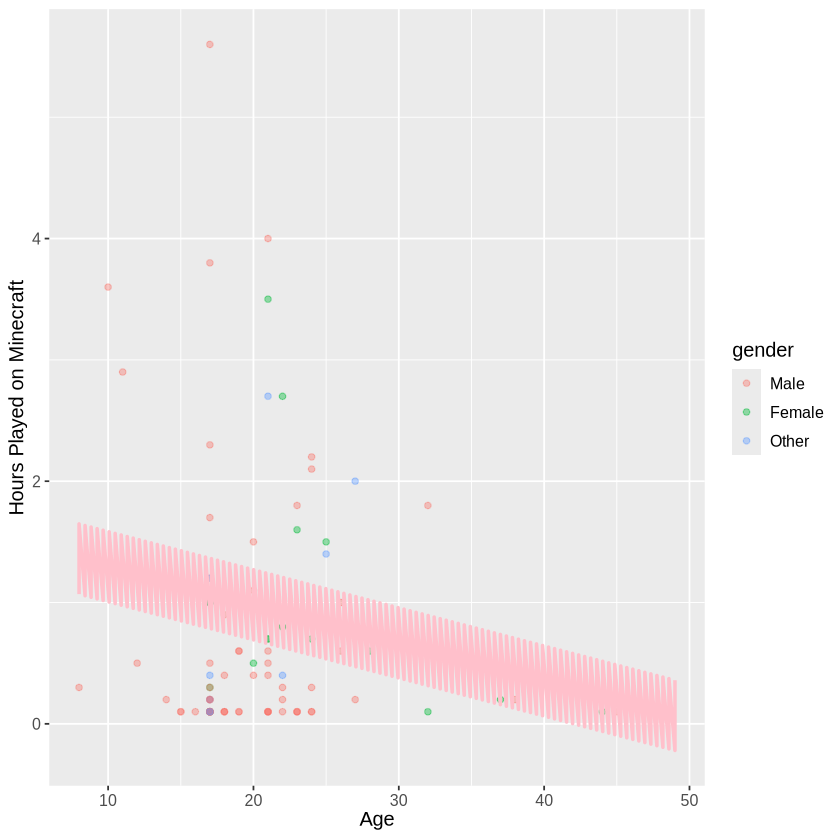

In [71]:
lm_plot_final <- ggplot(players_final2.0, aes(x = Age, y = played_hours, color = gender)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Age_preds,
            mapping = aes(x = Age, y = .pred),
            color = "pink",
            linewidth = 1) +
  xlab("Age") +
  ylab("Hours Played on Minecraft") +
  theme(text = element_text(size = 12))

lm_plot_final